In [0]:
import numpy as np
from scipy.io import loadmat
import scipy
from scipy.sparse import linalg
import matplotlib.pyplot as plt
from decimal import Decimal
import time
import matplotlib.pyplot as plt
import random
import scipy.io as sio

In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


# Image reconstruction in X-ray tomography

## 1 X-ray tomography

$\underline{\textbf{Q1.}}$ We start by loading the matrix $H$ and the image matrix $\bar{x}$

In [0]:
path = 'gdrive/My Drive/MVA/Large_Scale_Optim/'

In [0]:
x = loadmat(path + "data/x.mat")['x']
H = loadmat(path + "data/H.mat")['H']
G = loadmat(path + "data/G.mat")['G']

$\underline{\textbf{Q2.}}$ Let's Construct y using such that:
$$y = H\bar{x} + \omega $$
where $\omega \in \mathbb{R}^{M}$ is an i.i.d Gaussian noise with variance $\sigma^{2}$

In [0]:
M = H.shape[0]
N = x.shape[0]

sigma = 1
lamb = 0.13
delta = 0.02

w = np.random.normal(scale = sigma, size=(M,1))
y = H*x+w

$\underline{\textbf{Q3.}}$ Let's visualize the image $\bar{x}$, and a 2D version of $y$

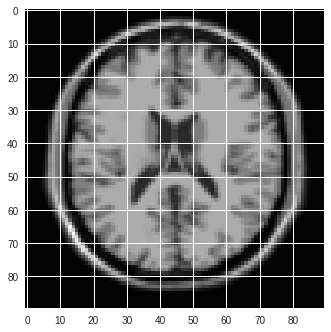

In [6]:
plt.imshow(x.reshape(90,90).T,cmap = 'gray')

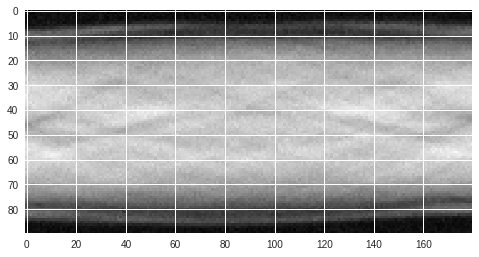

In [7]:
plt.imshow(y.reshape(180,90).T,cmap = 'gray')

## 2 Optimization problem

In [0]:
def f(x,y,G,H,lamb,delta):
    return 0.5*np.linalg.norm(H*x - y)**2 + lamb*r(x,delta,G) 

def grad_f(x,y,G,H,lamb,delta):
    return H.T*(H*x - y) + lamb * grad_r(x,delta,G)

def r(x,delta,G):
    return float(np.sum(psi(G*x,delta),axis=0))

def grad_r(x,delta,G):
    return G.T*psi_prime(G*x,delta)

def psi(u,delta):
    return np.sqrt(1+np.power(u,2)/delta**2)

def psi_prime(u,delta):
    return u/(delta**2 * psi(u,delta))
  
def omega_function(u,delta):
    return 1/(delta**2 * psi(u,delta))


def SNR(x_hat,x):
    return 10 * np.log10(np.linalg.norm(x)**2/np.linalg.norm(x-x_hat)**2)


$\underline{\textbf{Q2.}}$ Let be $x \in \mathbb{R}^{N}$, and let's compute $\nabla f(x)$

$$\nabla f(x) = H^{T}(Hx - y) + \lambda \nabla r(x) = H^{T}(Hx - y)  + G^{T}\Psi'(Gx)$$
Where $\Psi'(Gx) = \left(\Psi'([Gx]^{n})\right)_{1\leq n \leq 2N}$

$\underline{\textbf{Q3.}}$ Let's show that $\nabla f $ is $L$-Lipshitz with $L = \left\| H\right\|^{2} + \frac{\lambda}{\delta^{2}}\left\|G\right\|^{2}$. 

We know that $\forall x_1,x_2 \in \mathbb{R}^{N}$ $$\left\|\nabla f(x_1) - \nabla f(x_2)\right\| \leq \underset{\mathbb{R}^{N}}{\text{sup}}\left\|\nabla^{2}f\right\| . \left\|x_1-x_2\right\|$$ 

A simple computation show that, $\forall x \in \mathbb{R}^{N}$

$$\nabla^{2}f(x) = H^{T}H + \lambda G^{T}.\text{Diag}\left(\Psi''(Gx)\right).G$$

And since $\forall u \in \mathbb{R}$,  $\Psi''(u) = \frac{1}{\delta^{2}\sqrt{1+\frac{u^{2}}{\delta^{2}}}}\left( 1 - \frac{1}{\delta^2 + u^2}\right)$ . $\forall x \in \mathbb{R}^{N}$, $\left\|\nabla^{2} f(x)\right\| \leq \left\|H\right\|^{2} + \frac{\lambda}{\delta^2}\left\|G\right\|^{2}$

Therfore $\nabla f$ is $L$-lipshitz

In [9]:
from scipy.sparse.linalg import svds

uH, sH, vtH = svds(H)
uG, sG, vtG = svds(G)

L = np.amax(sH)**2 + lamb/(delta)*np.amax(sG)**2
print('L = {}'.format(L))

L = 15544.773276864795


## 3. Optimization algorithms

### 3.1. Gradient descent algorithm 

$\underline{\textbf{Q1.}}$ We create first $x_{0} \in \mathbb{R}^{N}$ a vector with all entries equal to 0. This will be our initialization for all tested algorithms

In [0]:
x0 = np.zeros((N,1))

$\underline{\textbf{Q2.}}$ We implement now a gradient descent algorithm to minimize $f$.

Iteration 0, objective: 2.64E+5, 449413.6140459983
Iteration 100, objective: 7.49E+3, 512.4124133507086
Iteration 200, objective: 6.77E+3, 224.64459116463397
Iteration 300, objective: 6.56E+3, 151.68484441013183
Iteration 400, objective: 6.45E+3, 114.22814231189223
Iteration 500, objective: 6.38E+3, 90.25120611548243
Iteration 600, objective: 6.34E+3, 73.51331577129902
Iteration 700, objective: 6.31E+3, 61.210734084243356
Iteration 800, objective: 6.29E+3, 51.887628298804735
Iteration 900, objective: 6.27E+3, 44.631838589568225
Iteration 1000, objective: 6.26E+3, 38.87594169556576
Iteration 1100, objective: 6.25E+3, 34.23736973944495
Iteration 1200, objective: 6.25E+3, 30.439978933425685
Iteration 1300, objective: 6.24E+3, 27.282772670901974
Iteration 1400, objective: 6.24E+3, 24.623511219612027
Iteration 1500, objective: 6.23E+3, 22.360046512862024
Iteration 1600, objective: 6.23E+3, 20.416184067060055
Iteration 1700, objective: 6.23E+3, 18.732080926575584
Iteration 1800, objective: 6

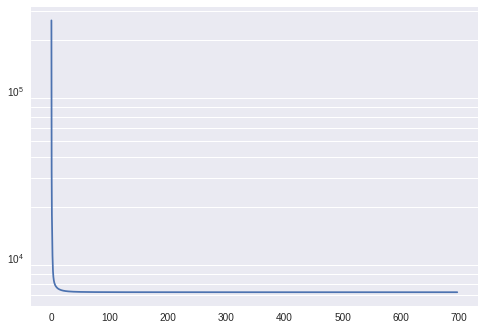

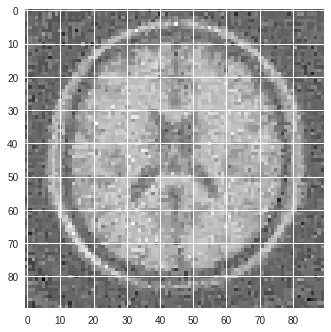

In [11]:
def gradient_descent(f,grad_f,x0,L,N,y,G,H,lamb,delta):
    gamma = 1/L
    grad = N*1e-4
    x = x0
    it = 0
    itermax = 20000
    objectives = []
    times = [0]
    
    while grad > np.sqrt(N)*1e-4 and it <= itermax: 
        
        t1 = time.time()
        gradient = grad_f(x,y,G,H,lamb,delta)
        x = x - gamma*gradient
        grad = np.linalg.norm(gradient)
        criterion = f(x,y,G,H,lamb,delta)        
        objectives.append(criterion)
        
        if it%100 == 0:
            print("Iteration {}, objective: {:.2E}, {}".format(it,Decimal(criterion),grad))          
        t2 = time.time()
        times.append(times[-1]+t2-t1)
        it += 1
    return x,objectives,times
        
x_hat,objectives,times = gradient_descent(f,grad_f,x0,L,N,y,G,H,0.01,delta)
plt.figure()
plt.semilogy(times[1:],objectives)
plt.grid(which='both')
print('\nSignal to Noise Ratio:',SNR(x_hat,x))
plt.figure()
plt.imshow(x_hat.reshape(90,90).T,cmap = 'gray')

### 3.2. MM quadratic algorithm

$\underline{\textbf{Q1.}}$We define $$A(x) = H^{T}H +  \frac{1}{\lambda}G^{T}\omega(x)G$$
Where $\omega(x) = \left( \frac{\psi'\left([Gx]^{(n)}\right)}{[Gx]^{n}}\right)_{0\leq n\leq 2N}$

Then a quadratic majorant function of $f$ is given by $$h(x,y) = f(y) + \left\langle \nabla f(y) | x-y \right\rangle + \frac{1}{2}\left\|x-y\right\|^{2}_{A(y)}$$ 



In [0]:
from scipy.sparse.linalg import LinearOperator
from scipy.sparse import diags


def psi_derivative(x, delta):
    return (x/delta**2)/np.sqrt(1 + x**2/delta**2)

def Deb(x):
    A=G@x 
    d=np.array([psi_derivative(np.abs(A[i, 0]), delta)/np.abs(A[i, 0]) for i in range(M)]).reshape(-1, 1)
    return scipy.sparse.diags(d[:,0]).tocsc()
  
def mv1(x):
    def result(y):
        return (H.T)@(H@y) + lamb*(G.T)@Deb(x)@(G@y)
    return result
    
A = lambda x: LinearOperator((N, N), matvec = mv1(x), rmatvec = mv1(x))   


$\underline{\textbf{Q2.}}$ We propose basic MM algorithm with $\theta_{n} = 1$ to to minimize $f$
$$x_{n+1} = x_{n}  - \theta_{n}A(x_{n})^{-1}\nabla f(x_{n})$$

Iteration 0, objective: 1.43E+4, 248749.6619949809, 6554.904172440932
Iteration 1, objective: 1.31E+4, 829.5413711318909, 6932.6726927028185
Iteration 2, objective: 1.29E+4, 386.5682434880396, 7052.136666073638
Iteration 3, objective: 1.28E+4, 201.75931066853803, 7093.875404116592
Iteration 4, objective: 1.28E+4, 122.15543180236857, 7109.937727325503
Iteration 5, objective: 1.28E+4, 82.12682094558076, 7116.871382802908
Iteration 6, objective: 1.28E+4, 58.964258026209905, 7120.3548018163165
Iteration 7, objective: 1.28E+4, 43.979374273248496, 7122.38884025217
Iteration 8, objective: 1.28E+4, 33.52906501118301, 7123.731804553126
Iteration 9, objective: 1.28E+4, 26.225344651505576, 7124.706503237054
Iteration 10, objective: 1.28E+4, 20.98700101816616, 7125.459227732808
Iteration 11, objective: 1.28E+4, 17.033069539499575, 7126.061165113342
Iteration 12, objective: 1.28E+4, 13.934651086532313, 7126.551492721872
Iteration 13, objective: 1.28E+4, 11.45966885786069, 7126.955056935303
Iteratio

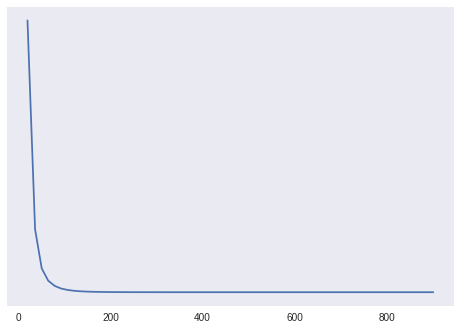

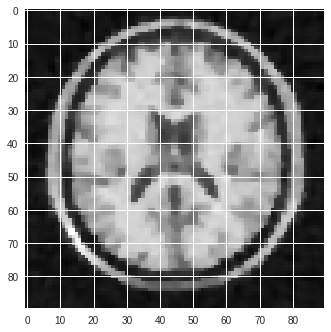

In [73]:
def MM_quadratic(f,grad_f,invA,x0,L,N,y,G,H,lamb,delta):
    grad = N*1e-4
    x = np.random.rand(N, 1)
    it = 0
    itermax = 100
    objectives = []
    times = [0]
    
    while grad > np.sqrt(N)*1e-4 and it <= itermax:         
        t1 = time.time()
        
        gradient = grad_f(x,y,G,H,lamb,delta)
        x = x - scipy.sparse.linalg.bicg(A(x), gradient)[0].reshape(-1, 1)

        grad = np.linalg.norm(gradient)
        criterion = f(x,y,G,H,lamb,delta)        
        objectives.append(criterion)
        
        if it%1 == 0:
            print("Iteration {}, objective: {:.2E}, {}, {}".format(it,Decimal(criterion),grad,0.5*np.linalg.norm(H*x - y)**2))        
        t2 = time.time()
        times.append(times[-1]+t2-t1)
        it += 1
    return x,objectives,times


x_hat,objectives,times = MM_quadratic(f,grad_f,A,x0,L,N,y,G,H,lamb,delta)
plt.figure()
plt.semilogy(times[1:],objectives)
plt.grid(which='both')
print('\nSignal to Noise Ratio:',SNR(x_hat,x))
plt.figure()
plt.imshow(x_hat.reshape(90,90).T,cmap = 'gray')

### 3.3. 3MG  algorithm

In [0]:
def A(x,G,H,lamb,delta):  
    
    return scipy.sparse.csr_matrix.todense(H.T*H + lamb/2*(G.T*scipy.sparse.spdiags(np.squeeze(omega_function(G*x,delta)),0,M,M))*G) # To compute

Iteration 0, objective: 2.44E+5, 464459.74735184695
Iteration 1, objective: 4.70E+4, 36264.10084275691
Iteration 2, objective: 2.13E+4, 11362.899267847517
Iteration 3, objective: 1.56E+4, 5974.512317180808
Iteration 4, objective: 8.19E+3, 4665.969994351633
Iteration 5, objective: 6.78E+3, 1824.4136027114935
Iteration 6, objective: 6.59E+3, 1607.7526496583766
Iteration 7, objective: 6.15E+3, 1562.3722520511537
Iteration 8, objective: 5.97E+3, 802.9798617934226
Iteration 9, objective: 5.88E+3, 674.9016998596583
Iteration 10, objective: 5.84E+3, 830.0664690402293
Iteration 11, objective: 5.80E+3, 446.1771916406474
Iteration 12, objective: 5.75E+3, 435.81654938422196
Iteration 13, objective: 5.74E+3, 296.6603880905627
Iteration 14, objective: 5.72E+3, 436.33899955640464
Iteration 15, objective: 5.70E+3, 229.13382840333597
Iteration 16, objective: 5.69E+3, 172.80924108949912
Iteration 17, objective: 5.68E+3, 251.83101847775134
Iteration 18, objective: 5.68E+3, 165.2255429799245
Iteration 19

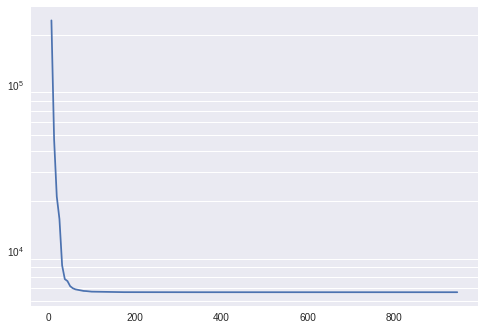

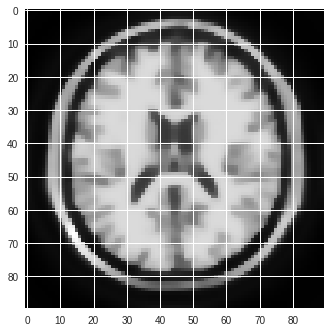

In [99]:
def MMMG(f,grad_f,A,x0,L,N,y,G,H,lamb,delta):
    gamma = 1/L
    grad = N*1e-4
    x = x0
    it = 0
    itermax = 1000
    objectives = []
    times = [0]
    
    while grad > np.sqrt(N)*1e-4 and it <= itermax: 
        t1 = time.time()
        gradient = grad_f(x,y,G,H,lamb,delta)
        if it == 0:
            D = - gradient
        else:
            D = np.concatenate((-gradient,diff),axis=1)
        
        temp = np.dot(D.T,A(x,G,H,lamb,delta)*D)
        u = - np.dot(np.linalg.pinv(temp),np.dot(D.T,gradient))
        x = x + np.dot(D,u)
        grad = np.linalg.norm(gradient)
        criterion = f(x,y,G,H,lamb,delta)        
        objectives.append(criterion)
        
        if it%1 == 0:
            print("Iteration {}, objective: {:.2E}, {}".format(it,Decimal(criterion),grad))        
        t2 = time.time()
        times.append(times[-1]+t2-t1)
        diff = np.dot(D,u)
        it += 1
    return x,objectives,times
        
x_hat,objectives,times = MMMG(f,grad_f,A,x0,L,N,y,G,H,lamb,delta)
plt.figure()
plt.semilogy(times[1:],objectives)
plt.grid(which='both')
print('\nSignal to Noise Ratio:',SNR(x_hat,x))
plt.figure()
plt.imshow(x_hat.reshape(90,90).T,cmap = 'gray')

## 3.4 Block-coordinate MM quadratic algorithm

In [0]:
def index_matrix(j, Nblock, x):
    Gr = G.toarray()
    A=   np.dot(H.toarray().T, H.toarray())+ lamb*np.dot(  np.dot( Gr.T, Deb(x).toarray() ), Gr)
    result = np.zeros((Nblock, Nblock))
    i =int(Nblock*(j-1))
    k = int(j*Nblock)
    return A[i:k, i:k]

In [0]:
def Block_coordinateMM(y, J):
    f = []
    itersv = []
    x = np.random.rand(N, 1)
    precision= np.sqrt(N)*(10**(-4))
    Nblock =int(N/J)
    gamma = 1.99/L
    grad = N*(10**(-4))
    iters=1
    itermax=100
    j = (iters-1)%J+1
    II = int(Nblock*(j-1))
    JJ =  int(j*Nblock)
    print(II, JJ)
    cur_xB = x[II:JJ]
    
    while grad > precision and iters < itermax:
        
        A = index_matrix(j, Nblock, x)
        prev_x = x
        print(A.shape)
        print()
        
        cur_xB = cur_xB -\
        scipy.sparse.linalg.bicg(A, grad_f(x, y, lamb)[II:JJ])[0].reshape(-1, 1)
        
        cur_x[II:JJ] = cur_xB
        
        iters = iters + 1
        j = (iters-1)%J+1
        II = int(Nblock*(j-1))
        JJ =  int(j*Nblock)
        cur_xB = cur_x[II:JJ]
        f.append(f(cur_x, y, lamb)[0])
        itersv.append(iters)
        previous_step_size =  np.linalg.norm((gradient( x, y, lamb)))
        print("Iteration {}, objective: {:.2E}, {}".format(iters,Decimal(f(cur_x, y, lamb)[0]),previous_step_size))
        
    return (cur_x, f, itersv)

y = H@x + sigma
result = Block_coordinateMM(y, 1)
plt.plot(result[2], result[1])

0 8100


### 3.5.  Parallel MM quadratic algorithm

$\underline{\textbf{Q1.}}$ Let be $x \in \mathbb{R}^{N}$, and $y\in \mathbb{R}^{N}$. We show that $y^{T}\left(B(x)- A(x)\right)y \geq 0$

$$ y^{T}H^{T}Hy = \sum_{m=1}^{M}\left(\sum_{p=1}^{N}H^{(m,p)}y_p)\right)^{2} =  \sum_{m=1}^{M}\left(\sum_{p=1}^{N}H^{(m,p)}\right)^{2}\times\left(\sum_{p=1}^{N}\frac{H^{(m,p)}}{\sum_{p=1}^{N}H^{(m,p)}}y_p)\right)^{2} \leq  \sum_{m=1}^{M} \sum_{p=1}^{N}H^{(m,p)}\sum_{p=1}^{N}H^{(m,p)}y_p^2$$ 

Where we have used Jenson Inequality in teh last inequality with the function square which is convex

In the same way we show that: 

$$y^{T}G^Tw(x)Gy \leq \sum_{m=1}^{M} \sum_{p=1}^{N}G^{(m,p)}\sum_{p=1}^{N}G^{(m,p)}(\omega(x))_{p}y_p^2$$

Where $w(x) = \frac{\dot{\psi}(Gx)}{Gx}$

Thus we can conclude that $y^{T}\left(B(x)- A(x)\right)y \geq 0$

In [0]:
import numpy as np
from scipy import linalg
import scipy
import multiprocessing

numProcessors = 4
p = multiprocessing.Pool( numProcessors )


def phi(u, delta):
    return np.sqrt(1+ u**2/delta**2)
def r(x):
    result = np.zeros((M, 1))
    for i in range(M):
        result[i, 0] = phi((G@x)[i, 0], delta) 
    return sum(result)

def criterionfunction(x, y, lambdaa):
    return (1/2)*np.linalg.norm(H@x - y)**2 + lambdaa*r(x)

def phi_derivative(x, delta):
    return (x/delta**2)/np.sqrt(1 + x**2/delta**2)

def gradient(x, y, lambdaa):
    return (HH.T)@(HH@x-y)+ lambdaa*GG.T@phi_derivative(GG@x, delta)


def B(x, delta, lambdaa):
    B= np.zeros((N, N))
    for i in range(N):
        phi_Gx = np.array([phi_derivative( (G@x)[j, 0] , delta)/(G@x)[j, 0] for j in range(M)])
        H_i = np.zeros((1, M))
        G_i = np.zeros((1, M))
        for m in range(M):
            H_i[0,m] = np.abs(H[m, i])*np.sum(np.abs(H[m, :]))
            G_i[0,m] = np.abs(G[m, i])*np.sum(np.abs(G[m, :]))
        B[i,i] = 1/np.sum( H_i)+ lambdaa* np.dot(G_i, phi_Gx[:,None])
    return B

def MM_parallel(y):
    x = np.random.rand(N, 1)
    precision= np.sqrt(N)*(10**(-4))
    gamma = 1.99/L
    grad = N*1e-4
    it = 0
    itermax=10
    objectives = []
    times = [0]
    while grad > np.sqrt(N)*1e-4 and it <= itermax:
        t1 = time.time()
        x = x - B(x, delta, lamb)@gradient(x, y, lamb)
        grad = np.linalg.norm((gradient( x, y, lamb)))
        criterion = f(x,y,G,H,lamb,delta)
        objectives.append(criterion)
        
        if it%1 == 0:
            print("Iteration {}, objective: {:.2E}, {}, {}".format(it,Decimal(criterion),grad,0.5*np.linalg.norm(H*x - y)**2))        
        t2 = time.time()
        times.append(times[-1]+t2-t1)
        it += 1
        
    return x,objectives,times

x_hat,objectives,times = MM_parallel(y)
plt.figure()
plt.semilogy(times[1:],objectives)
plt.grid(which='both')
print('\nSignal to Noise Ratio:',SNR(x_hat,x))
plt.figure()
plt.imshow(x_hat.reshape(90,90).T,cmap = 'gray')
